In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
df_train=pd.read_csv('development_dataset.csv')

In [147]:
df_train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High


In [148]:
df_train.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9',
       'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17',
       'VAR18', 'VAR19', 'VAR20', 'VAR21'],
      dtype='object')

In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 21 columns):
VAR1     34000 non-null int64
VAR2     33039 non-null float64
VAR3     30615 non-null float64
VAR4     21506 non-null float64
VAR5     33999 non-null float64
VAR6     30505 non-null float64
VAR7     33165 non-null float64
VAR8     33165 non-null float64
VAR9     18183 non-null float64
VAR10    29450 non-null float64
VAR11    26435 non-null float64
VAR12    23498 non-null float64
VAR13    25478 non-null float64
VAR14    34000 non-null object
VAR15    25976 non-null float64
VAR16    33134 non-null float64
VAR17    11806 non-null float64
VAR18    34000 non-null int64
VAR19    34000 non-null int64
VAR20    34000 non-null float64
VAR21    34000 non-null object
dtypes: float64(16), int64(3), object(2)
memory usage: 5.4+ MB


In [150]:
missing_count = (df_train.isnull().sum()/len(df_train)) *100

#filter to find the missing count > 0

missing_count = missing_count[missing_count > 0]
print(missing_count.sort_values())

VAR5      0.002941
VAR7      2.455882
VAR8      2.455882
VAR16     2.547059
VAR2      2.826471
VAR3      9.955882
VAR6     10.279412
VAR10    13.382353
VAR11    22.250000
VAR15    23.600000
VAR13    25.064706
VAR12    30.888235
VAR4     36.747059
VAR9     46.520588
VAR17    65.276471
dtype: float64


In [151]:
# Finding numerical features

numeric_data = df_train.select_dtypes(include = [np.number])

#Finding categorial features

categorical_data = df_train.select_dtypes(exclude = [np.number])

In [152]:
print("There are", numeric_data.shape[1], "dataset features")

There are 19 dataset features


In [153]:
print("There are", categorical_data.shape[1], "dataset features")

There are 2 dataset features


In [154]:
del numeric_data['VAR1']
numeric_data.columns

Index(['VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9', 'VAR10',
       'VAR11', 'VAR12', 'VAR13', 'VAR15', 'VAR16', 'VAR17', 'VAR18', 'VAR19',
       'VAR20'],
      dtype='object')

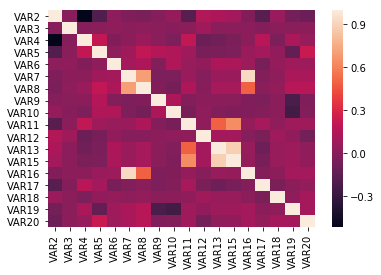

In [155]:
#correltation plot of features on numeric data

corr = numeric_data.corr()
sns.heatmap(corr)

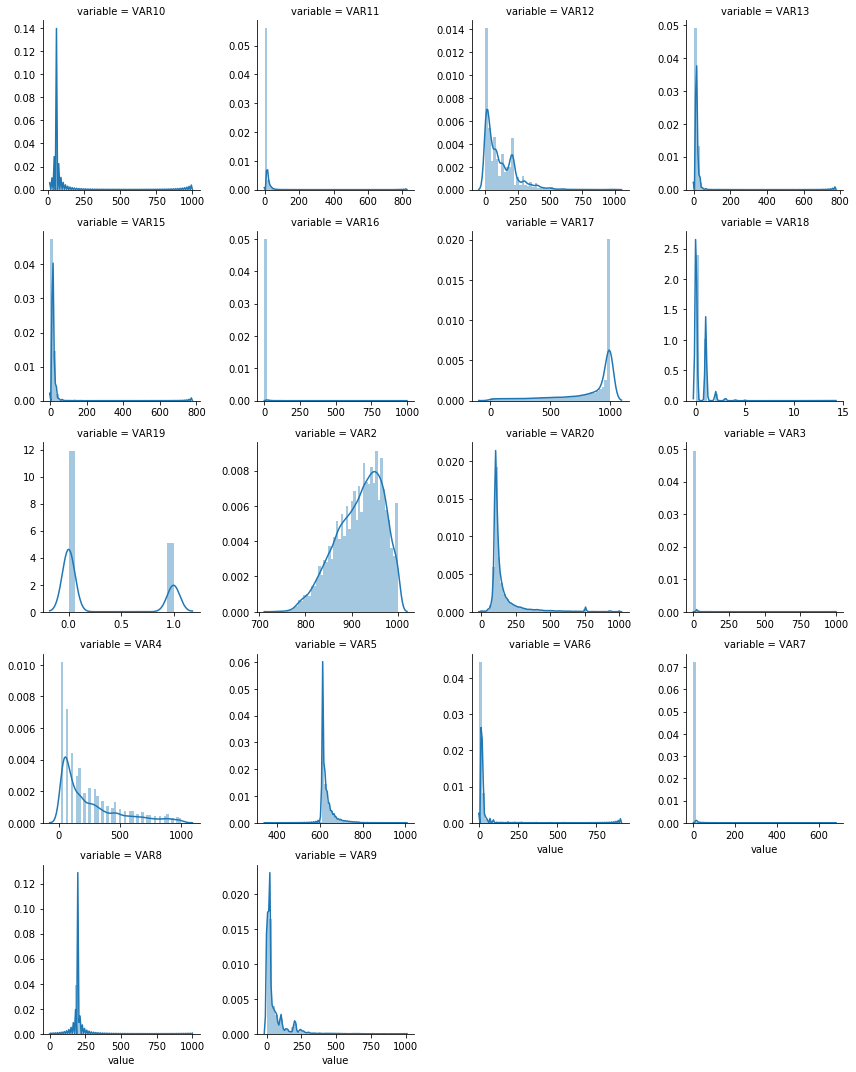

In [156]:
#Distribution of Numerical features

f = pd.melt(df_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [157]:
df_train.VAR10.describe()

count    29450.000000
mean        56.497320
std          6.861058
min         13.028620
25%         57.458373
50%         58.632548
75%         58.632548
max       1000.000000
Name: VAR10, dtype: float64

In [18]:
#Finding numerical Features

numeric_data = df_train.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = df_train.select_dtypes(exclude = np.number)


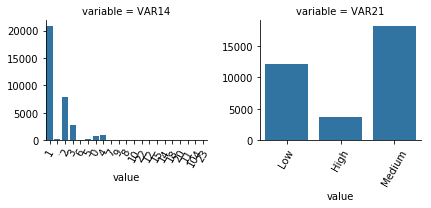

In [158]:
#Plot the count of Categorial Features

f = pd.melt(df_train, value_vars=sorted(categorial_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex=False, sharey=False)
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [159]:
df_train.VAR21.replace({'Low':0, 'Medium':2, 'High':3}, inplace = True)


In [160]:
df_train.VAR21.head()

0    0
1    3
2    2
3    0
4    3
Name: VAR21, dtype: int64

In [161]:
cat_to_num_features=['VAR14','VAR21']

In [162]:
df_train[cat_to_num_features] = df_train[cat_to_num_features].fillna(0)
df_train[cat_to_num_features].head()

,VAR14,VAR21
0,1,0
1,1,3
2,1,2
3,1,0
4,.,3


In [163]:
#Finding numerical Features

numeric_data = df_train.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = df_train.select_dtypes(exclude = np.number)


In [164]:
print("There are", numeric_data.shape[1], "dataset features")

There are 20 dataset features


In [165]:
print("There are", categorial_data.shape[1], "dataset features")

There are 1 dataset features


In [166]:
df_train.VAR2.unique()

array([ 828.24,  911.76,  962.35,  892.94,  914.12,  794.12,  987.06,
        921.18,  947.06,  940.  ,  931.76,  882.35,  958.82,  937.65,
        808.24,  944.71,  798.82,  974.12,  927.06,  918.82,  982.35,
        847.06,  897.65,  952.94,  871.76,  877.65,  894.12,  845.88,
        963.53,  956.47,  883.53,  923.53,  887.06,  976.47,  967.06,
        854.12, 1000.  ,  889.41,  880.  ,  917.65,  848.24,  968.24,
           nan,  960.  ,  908.24,  957.65,  875.29,  994.12,  912.94,
        916.47,  948.24,  922.35,  851.76,  938.82,  822.35,  860.  ,
        867.06,  932.94,  996.47,  830.59,  904.71,  881.18,  902.35,
        807.06,  935.29,  972.94,  936.47,  838.82,  928.24,  981.18,
        980.  ,  955.29,  872.94,  934.12,  849.41,  858.82,  868.24,
        907.06,  869.41,  777.65,  905.88,  831.76,  964.71,  915.29,
        843.53,  961.18,  896.47,  884.71,  885.88,  942.35,  945.88,
        888.24,  941.18,  943.53,  856.47,  903.53,  790.59,  990.59,
        901.18,  910

In [167]:
df_train['VAR2'].describe()

count    33039.000000
mean       917.391603
std         50.222389
min        730.588235
25%        882.352941
50%        924.705882
75%        956.470588
max       1000.000000
Name: VAR2, dtype: float64

In [168]:
df_train['VAR2']=df_train['VAR2'].fillna(np.mean(df_train['VAR2']))

In [169]:
df_train.VAR3.unique()

array([0.14, 0.03, 0.83, ..., 1.32, 1.89, 0.18])

In [170]:
df_train['VAR3']=df_train['VAR3'].fillna(np.mean(df_train['VAR3']))

In [171]:
df_train.VAR4.unique()

array([ 321.43,     nan,   35.71,  178.57,  821.43,  107.14,  142.86,
        392.86,   71.43,  678.57,  571.43,  250.  ,  464.29,  642.86,
        285.71,  357.14,  928.57,  214.29,  428.57,  535.71,  500.  ,
        892.86,  714.29,  750.  ,  632.86, 1000.  ,  607.14,  964.29,
        785.71,  857.14,  128.21,  597.5 ,   92.86,  245.71,   34.64,
         73.57,   28.57,  864.29,  157.14,  527.14,   18.93,  316.07,
        738.21])

In [172]:
df_train['VAR4']=df_train['VAR4'].fillna(np.mean(df_train['VAR4']))

In [173]:
df_train.VAR5.unique()

array([625.91, 611.57, 615.83, ..., 612.22, 682.76, 650.42])

In [174]:
df_train.VAR5=df_train['VAR5'].fillna(np.mean(df_train['VAR5']))

In [175]:
df_train.VAR6.unique()

array([1.82e+00, 8.18e+00, 9.09e+00, 5.18e+00, 1.27e+01,      nan,
       1.82e+01, 2.36e+01, 2.73e+01, 1.14e+01, 2.09e+00, 6.64e+00,
       5.91e+00, 1.64e+01, 5.45e+00, 2.27e+00, 2.45e+01, 4.67e+00,
       3.18e+01, 1.36e+01, 7.55e+00, 4.55e+00, 3.91e+01, 6.82e+00,
       8.82e+00, 7.73e+00, 2.27e+01, 6.36e+00, 1.09e+01, 2.55e+00,
       3.64e+00, 7.27e+00, 1.00e+01, 6.36e+01, 8.64e+00, 4.55e+01,
       1.52e+01, 3.91e+00, 6.59e+00, 2.27e+01, 3.82e+01, 9.09e+01,
       2.73e+00, 3.64e+01, 1.73e+01, 1.64e+00, 9.09e+02, 1.59e+01,
       6.09e+00, 1.79e+01, 1.45e+01, 5.23e+00, 3.64e-01, 6.37e+01,
       4.11e+00, 3.18e+00, 4.09e+01, 1.14e+00, 5.00e+00, 7.64e+00,
       4.09e+00, 2.55e+01, 2.09e+01, 4.55e-01, 2.05e+01, 6.73e+00,
       4.36e+00, 7.27e+01, 1.18e+01, 1.59e+00, 6.82e+01, 3.41e+01,
       1.02e+01, 2.14e+01, 2.91e+02, 7.09e+00, 2.45e+00, 2.77e+01,
       2.73e+02, 6.09e-01, 1.55e+01, 2.95e+01, 9.55e+00, 9.09e-01,
       1.24e+01, 3.32e+01, 4.91e+00, 9.45e+00, 1.20e+01, 3.27e

In [176]:
df_train['VAR6']=df_train['VAR6'].fillna(np.mean(df_train['VAR6']))

In [177]:
df_train.VAR7.unique()

array([1.08, 1.34, 0.72, ..., 0.97, 0.62, 2.64])

In [178]:
df_train['VAR7']=df_train['VAR7'].fillna(np.mean(df_train['VAR7']))

In [179]:
df_train.VAR8.unique()

array([198.11, 198.6 , 197.27, ..., 197.44, 198.25, 201.39])

In [180]:
df_train['VAR8']=df_train['VAR8'].fillna(np.mean(df_train['VAR8']))

In [181]:
df_train['VAR9']=df_train['VAR9'].fillna(np.mean(df_train['VAR9']))

In [182]:
df_train['VAR10']=df_train['VAR10'].fillna(np.mean(df_train['VAR10']))

In [183]:
df_train['VAR11']=df_train['VAR11'].fillna(np.mean(df_train['VAR11']))

In [184]:
df_train['VAR12']=df_train['VAR12'].fillna(np.mean(df_train['VAR12']))

In [185]:
df_train['VAR13']=df_train['VAR13'].fillna(np.mean(df_train['VAR13']))

In [186]:
df_train.VAR15.unique()

array([ 1.  ,   nan, 10.  , ..., 21.17,  2.05,  2.52])

In [187]:
df_l['VAR14']=df_l['VAR14'].fillna('1')

In [188]:
df_train['VAR15']=df_train['VAR15'].fillna(np.mean(df_train['VAR15']))

In [189]:
df_train['VAR16']=df_train['VAR16'].fillna(np.mean(df_train['VAR16']))

In [190]:
df_train['VAR17']=df_train['VAR17'].fillna(np.mean(df_train['VAR17']))

In [191]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 21 columns):
VAR1     34000 non-null int64
VAR2     34000 non-null float64
VAR3     34000 non-null float64
VAR4     34000 non-null float64
VAR5     34000 non-null float64
VAR6     34000 non-null float64
VAR7     34000 non-null float64
VAR8     34000 non-null float64
VAR9     34000 non-null float64
VAR10    34000 non-null float64
VAR11    34000 non-null float64
VAR12    34000 non-null float64
VAR13    34000 non-null float64
VAR14    34000 non-null object
VAR15    34000 non-null float64
VAR16    34000 non-null float64
VAR17    34000 non-null float64
VAR18    34000 non-null int64
VAR19    34000 non-null int64
VAR20    34000 non-null float64
VAR21    34000 non-null int64
dtypes: float64(16), int64(4), object(1)
memory usage: 5.4+ MB


In [192]:
#model making using SVM


import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [193]:
df.dtypes

VAR1       int64
VAR2     float64
VAR3     float64
VAR4     float64
VAR5     float64
VAR6     float64
VAR7     float64
VAR8     float64
VAR9     float64
VAR10    float64
VAR11    float64
VAR12    float64
VAR13    float64
VAR14     object
VAR15    float64
VAR16    float64
VAR17    float64
VAR18      int64
VAR19      int64
VAR20    float64
VAR21     object
dtype: object

In [194]:
feature_df = df_train[['VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR15', 'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20']]
X = np.asarray(feature_df)
X[0:5]

array([[8.28e+02, 1.39e-01, 3.21e+02, 6.26e+02, 1.82e+00, 1.08e+00,
        1.98e+02, 5.40e+01, 5.86e+01, 2.79e-01, 1.00e+02, 1.00e+00,
        1.00e+00, 1.54e+00, 8.21e+02, 1.00e+00, 0.00e+00, 1.00e+02],
       [9.12e+02, 2.78e-02, 2.48e+02, 6.12e+02, 8.18e+00, 1.34e+00,
        1.99e+02, 2.21e+01, 5.65e+01, 5.43e+00, 1.50e+01, 1.17e+01,
        1.25e+01, 1.61e+00, 8.21e+02, 0.00e+00, 1.00e+00, 1.47e+02],
       [9.62e+02, 8.33e-01, 3.57e+01, 6.16e+02, 8.18e+00, 7.21e-01,
        1.97e+02, 5.40e+01, 5.86e+01, 4.53e-01, 2.10e+02, 1.00e+01,
        1.00e+01, 1.04e+00, 8.21e+02, 0.00e+00, 0.00e+00, 9.82e+01],
       [8.93e+02, 1.12e+00, 2.48e+02, 6.38e+02, 9.09e+00, 8.20e-01,
        1.97e+02, 4.36e+00, 5.86e+01, 5.43e+00, 1.17e+02, 1.17e+01,
        1.25e+01, 1.15e+00, 8.21e+02, 1.00e+00, 0.00e+00, 1.41e+02],
       [9.14e+02, 8.33e-02, 2.48e+02, 6.27e+02, 5.18e+00, 1.37e+00,
        1.99e+02, 8.59e+01, 5.86e+01, 5.43e+00, 2.10e+02, 1.17e+01,
        1.25e+01, 1.56e+00, 8.21e+02, 1.00e+

In [195]:
df_train['VAR21'] = df_train['VAR21'].astype('int')
y = np.asarray(df_train['VAR21'])
y [0:5]

array([0, 3, 2, 0, 3])

In [196]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (27200, 18) (27200,)
Test set: (6800, 18) (6800,)


In [197]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [198]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 2, 2, 2, 2])

In [199]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [200]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.29      0.00      0.00      2344
           2       0.54      1.00      0.70      3687
           3       0.00      0.00      0.00       769

   micro avg       0.54      0.54      0.54      6800
   macro avg       0.28      0.33      0.24      6800
weighted avg       0.39      0.54      0.38      6800

Confusion matrix, without normalization
[[3678    0]
 [   0    0]]


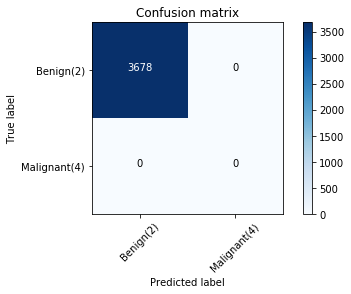

In [201]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [202]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.382002720647314

In [203]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5414705882352941

In [223]:
df_train.VAR21.replace({0:'Low', 2:'Medium', 3:'High'}, inplace = True)

In [233]:
df_train.VAR21.head()

0       Low
1      High
2    Medium
3       Low
4      High
Name: VAR21, dtype: object

In [234]:
df_l=pd.read_csv('leaderboard_dataset.csv')

In [235]:
df_l['VAR2']=df_l['VAR2'].fillna(np.mean(df_l['VAR2']))
df_l['VAR3']=df_l['VAR3'].fillna(np.mean(df_l['VAR3']))
df_l['VAR4']=df_l['VAR4'].fillna(np.mean(df_l['VAR4']))
df_l['VAR5']=df_l['VAR5'].fillna(np.mean(df_l['VAR5']))
df_l['VAR6']=df_l['VAR6'].fillna(np.mean(df_l['VAR6']))
df_l['VAR7']=df_l['VAR7'].fillna(np.mean(df_l['VAR7']))
df_l['VAR8']=df_l['VAR8'].fillna(np.mean(df_l['VAR8']))
df_l['VAR9']=df_l['VAR9'].fillna(np.mean(df_l['VAR9']))


In [236]:
df_l['VAR10']=df_l['VAR10'].fillna(np.mean(df_l['VAR10']))
df_l['VAR11']=df_l['VAR11'].fillna(np.mean(df_l['VAR11']))
df_l['VAR12']=df_l['VAR12'].fillna(np.mean(df_l['VAR12']))
df_l['VAR13']=df_l['VAR13'].fillna(np.mean(df_l['VAR13']))
df_l['VAR15']=df_l['VAR15'].fillna(np.mean(df_l['VAR15']))
df_l['VAR16']=df_l['VAR16'].fillna(np.mean(df_l['VAR16']))
df_l['VAR17']=df_l['VAR17'].fillna(np.mean(df_l['VAR17']))
df_l['VAR18']=df_l['VAR18'].fillna(np.mean(df_l['VAR18']))
df_l['VAR19']=df_l['VAR19'].fillna(np.mean(df_l['VAR19']))
df_l['VAR20']=df_l['VAR20'].fillna(np.mean(df_l['VAR20']))

In [237]:
df_l['VAR14']=df_l['VAR14'].fillna(1)

In [238]:
feature_df1 = df_l[['VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR15', 'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20']]
X1 = np.asarray(feature_df1)
X1[0:5]

array([[8.79e+02, 8.33e-01, 8.21e+02, 6.21e+02, 5.18e+00, 8.34e-01,
        1.98e+02, 5.30e+01, 5.86e+01, 9.43e+00, 4.00e+01, 1.00e+01,
        1.00e+01, 1.21e+00, 1.00e+03, 1.00e+00, 0.00e+00, 4.81e+01],
       [8.92e+02, 1.39e-01, 3.57e+02, 6.14e+02, 3.91e+00, 5.95e-01,
        1.97e+02, 2.54e+02, 5.86e+01, 1.01e+01, 1.15e+02, 5.67e+00,
        7.60e+00, 1.00e+00, 9.93e+02, 0.00e+00, 0.00e+00, 1.04e+02],
       [9.55e+02, 5.56e-02, 2.45e+02, 6.12e+02, 6.36e+00, 9.19e-01,
        1.98e+02, 2.21e+01, 5.64e+01, 5.83e-01, 1.15e+02, 6.00e+00,
        6.00e+00, 1.16e+00, 8.22e+02, 1.00e+00, 1.00e+00, 1.21e+02],
       [8.32e+02, 1.11e-01, 2.50e+02, 6.18e+02, 6.55e+00, 2.38e+00,
        2.01e+02, 5.30e+01, 4.85e+01, 5.33e+00, 1.15e+02, 1.19e+01,
        1.27e+01, 2.35e+00, 8.22e+02, 0.00e+00, 1.00e+00, 1.69e+02],
       [9.58e+02, 1.67e-01, 2.45e+02, 6.23e+02, 1.52e+01, 7.11e-01,
        1.97e+02, 5.01e+00, 4.94e+01, 2.56e-01, 1.15e+02, 1.33e+01,
        1.33e+01, 1.17e+00, 8.22e+02, 0.00e+

In [245]:
val = clf.predict(X1)

In [249]:
df = pd.DataFrame(data=val.flatten())

df.replace({0:'Low', 2:'Medium', 3:'High'}, inplace = True)


,0
0,Medium
1,Medium
2,Medium
3,Medium
4,Medium
5,Medium
6,Medium
7,Medium
8,Medium
9,Medium


In [251]:
value1=df[0]

In [252]:
value1

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
5       Medium
6       Medium
7       Medium
8       Medium
9       Medium
10      Medium
11      Medium
12      Medium
13      Medium
14      Medium
15      Medium
16      Medium
17      Medium
18      Medium
19      Medium
20      Medium
21      Medium
22      Medium
23      Medium
24      Medium
25      Medium
26      Medium
27      Medium
28      Medium
29      Medium
         ...  
9970    Medium
9971    Medium
9972    Medium
9973    Medium
9974    Medium
9975    Medium
9976    Medium
9977    Medium
9978    Medium
9979    Medium
9980    Medium
9981    Medium
9982    Medium
9983    Medium
9984    Medium
9985    Medium
9986    Medium
9987    Medium
9988    Medium
9989    Medium
9990    Medium
9991    Medium
9992    Medium
9993    Medium
9994    Medium
9995    Medium
9996    Medium
9997    Medium
9998    Medium
9999    Medium
Name: 0, Length: 10000, dtype: object

In [253]:
index=np.arange(1,10001)
data123563=pd.DataFrame(data=value1,index=index)
data123563.to_csv('Homelanders_IITGuwahati_9.csv',header=None)

In [255]:
df_t=pd.read_csv('Evaluation_dataset.csv')

In [257]:
df_t['VAR2']=df_l['VAR2'].fillna(np.mean(df_t['VAR2']))
df_t['VAR3']=df_l['VAR3'].fillna(np.mean(df_t['VAR3']))
df_t['VAR4']=df_l['VAR4'].fillna(np.mean(df_t['VAR4']))
df_t['VAR5']=df_l['VAR5'].fillna(np.mean(df_t['VAR5']))
df_t['VAR6']=df_l['VAR6'].fillna(np.mean(df_t['VAR6']))
df_t['VAR7']=df_l['VAR7'].fillna(np.mean(df_t['VAR7']))
df_t['VAR8']=df_l['VAR8'].fillna(np.mean(df_t['VAR8']))
df_t['VAR9']=df_l['VAR9'].fillna(np.mean(df_t['VAR9']))


In [258]:
df_t['VAR10']=df_l['VAR10'].fillna(np.mean(df_t['VAR10']))
df_t['VAR11']=df_l['VAR11'].fillna(np.mean(df_t['VAR11']))
df_t['VAR12']=df_l['VAR12'].fillna(np.mean(df_t['VAR12']))
df_t['VAR13']=df_l['VAR13'].fillna(np.mean(df_t['VAR13']))
df_t['VAR15']=df_l['VAR15'].fillna(np.mean(df_t['VAR15']))
df_t['VAR16']=df_l['VAR16'].fillna(np.mean(df_t['VAR16']))
df_t['VAR17']=df_l['VAR17'].fillna(np.mean(df_t['VAR17']))
df_t['VAR18']=df_l['VAR18'].fillna(np.mean(df_t['VAR18']))
df_t['VAR19']=df_l['VAR19'].fillna(np.mean(df_t['VAR19']))
df_t['VAR20']=df_l['VAR20'].fillna(np.mean(df_t['VAR20']))

In [259]:
df_t['VAR14']=df_t['VAR14'].fillna(1)

In [260]:
feature_df2 = df_t[['VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR15', 'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20']]
X2 = np.asarray(feature_df2)
X2[0:5]

array([[8.79e+02, 8.33e-01, 8.21e+02, 6.21e+02, 5.18e+00, 8.34e-01,
        1.98e+02, 5.30e+01, 5.86e+01, 9.43e+00, 4.00e+01, 1.00e+01,
        1.00e+01, 1.21e+00, 1.00e+03, 1.00e+00, 0.00e+00, 4.81e+01],
       [8.92e+02, 1.39e-01, 3.57e+02, 6.14e+02, 3.91e+00, 5.95e-01,
        1.97e+02, 2.54e+02, 5.86e+01, 1.01e+01, 1.15e+02, 5.67e+00,
        7.60e+00, 1.00e+00, 9.93e+02, 0.00e+00, 0.00e+00, 1.04e+02],
       [9.55e+02, 5.56e-02, 2.45e+02, 6.12e+02, 6.36e+00, 9.19e-01,
        1.98e+02, 2.21e+01, 5.64e+01, 5.83e-01, 1.15e+02, 6.00e+00,
        6.00e+00, 1.16e+00, 8.22e+02, 1.00e+00, 1.00e+00, 1.21e+02],
       [8.32e+02, 1.11e-01, 2.50e+02, 6.18e+02, 6.55e+00, 2.38e+00,
        2.01e+02, 5.30e+01, 4.85e+01, 5.33e+00, 1.15e+02, 1.19e+01,
        1.27e+01, 2.35e+00, 8.22e+02, 0.00e+00, 1.00e+00, 1.69e+02],
       [9.58e+02, 1.67e-01, 2.45e+02, 6.23e+02, 1.52e+01, 7.11e-01,
        1.97e+02, 5.01e+00, 4.94e+01, 2.56e-01, 1.15e+02, 1.33e+01,
        1.33e+01, 1.17e+00, 8.22e+02, 0.00e+

In [261]:
val1 = clf.predict(X2)

In [262]:
df = pd.DataFrame(data=val.flatten())

df.replace({0:'Low', 2:'Medium', 3:'High'}, inplace = True)


In [264]:
value2=df[0]

In [265]:
value2

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
5       Medium
6       Medium
7       Medium
8       Medium
9       Medium
10      Medium
11      Medium
12      Medium
13      Medium
14      Medium
15      Medium
16      Medium
17      Medium
18      Medium
19      Medium
20      Medium
21      Medium
22      Medium
23      Medium
24      Medium
25      Medium
26      Medium
27      Medium
28      Medium
29      Medium
         ...  
9970    Medium
9971    Medium
9972    Medium
9973    Medium
9974    Medium
9975    Medium
9976    Medium
9977    Medium
9978    Medium
9979    Medium
9980    Medium
9981    Medium
9982    Medium
9983    Medium
9984    Medium
9985    Medium
9986    Medium
9987    Medium
9988    Medium
9989    Medium
9990    Medium
9991    Medium
9992    Medium
9993    Medium
9994    Medium
9995    Medium
9996    Medium
9997    Medium
9998    Medium
9999    Medium
Name: 0, Length: 10000, dtype: object

In [267]:
index=np.arange(1,10001)
data123563=pd.DataFrame(data=value2,index=index)
data123563.to_csv('Homelanders_IITGuwahati.csv',header=None)